In [26]:
from src import SpotifyService
from src.utils import convert_json_to_df, split_into_batches
from src.data_process import preprocess_data, plot_feature_dists, calc_correlation, plot_correlation
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
service = SpotifyService()

In [3]:
artist = 'The Weeknd'

In [4]:
tracks_s = service.get_songs_from_artist_name(artist)

In [5]:
len(tracks_s)

977

In [6]:
chunks = split_into_batches(tracks_s.values)

In [8]:
audio_feats_df = service.get_audio_feats_full(chunks)

In [10]:
audio_feats_df['popularity'] = audio_feats_df['id'].apply(service.get_popularity_from_track_id)

In [15]:
audio_feats_df

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature,popularity
0,0.625,0.523,1,-8.227,0,0.0369,0.36600,0.000003,0.0826,0.191,139.964,audio_features,6bNvCDQbuccUqUsG9BObKg,spotify:track:6bNvCDQbuccUqUsG9BObKg,https://api.spotify.com/v1/tracks/6bNvCDQbuccU...,https://api.spotify.com/v1/audio-analysis/6bNv...,307347,4,3
1,0.695,0.569,0,-7.684,1,0.0955,0.17400,0.000127,0.1230,0.294,147.937,audio_features,69RmmcCJmwx9gFzNhXUHRi,spotify:track:69RmmcCJmwx9gFzNhXUHRi,https://api.spotify.com/v1/tracks/69RmmcCJmwx9...,https://api.spotify.com/v1/audio-analysis/69Rm...,247192,4,23
2,0.702,0.586,9,-7.830,0,0.0313,0.03880,0.000073,0.1560,0.608,134.951,audio_features,023licWZhzzZm5SrpTpKUP,spotify:track:023licWZhzzZm5SrpTpKUP,https://api.spotify.com/v1/tracks/023licWZhzzZ...,https://api.spotify.com/v1/audio-analysis/023l...,199111,4,17
3,0.650,0.364,8,-11.716,0,0.0585,0.43400,0.001100,0.1010,0.165,120.193,audio_features,3hKQ00uyhOoxPbEmbTU6iR,spotify:track:3hKQ00uyhOoxPbEmbTU6iR,https://api.spotify.com/v1/tracks/3hKQ00uyhOox...,https://api.spotify.com/v1/audio-analysis/3hKQ...,321031,4,20
4,0.634,0.735,9,-6.906,0,0.0513,0.19600,0.000508,0.6370,0.366,115.049,audio_features,5bsI6Vg18pW3ScGVubieZM,spotify:track:5bsI6Vg18pW3ScGVubieZM,https://api.spotify.com/v1/tracks/5bsI6Vg18pW3...,https://api.spotify.com/v1/audio-analysis/5bsI...,267920,4,19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,0.527,0.502,5,-8.593,0,0.0712,0.65600,0.000038,0.0961,0.608,95.056,audio_features,7EO21AonPSkGUv5yWpIAfp,spotify:track:7EO21AonPSkGUv5yWpIAfp,https://api.spotify.com/v1/tracks/7EO21AonPSkG...,https://api.spotify.com/v1/audio-analysis/7EO2...,96232,4,23
73,0.747,0.739,8,-6.008,1,0.0487,0.01060,0.000022,0.1010,0.523,120.996,audio_features,3BDfbO1NeW5nB7v5hw4Flm,spotify:track:3BDfbO1NeW5nB7v5hw4Flm,https://api.spotify.com/v1/tracks/3BDfbO1NeW5n...,https://api.spotify.com/v1/audio-analysis/3BDf...,220196,4,9
74,0.663,0.537,6,-8.287,0,0.0361,0.36900,0.000000,0.0823,0.196,120.049,audio_features,1FFShrKUIq1JiOLiZbg2JC,spotify:track:1FFShrKUIq1JiOLiZbg2JC,https://api.spotify.com/v1/tracks/1FFShrKUIq1J...,https://api.spotify.com/v1/audio-analysis/1FFS...,315672,4,48
75,0.658,0.575,9,-6.062,1,0.0313,0.00963,0.000005,0.1910,0.335,114.081,audio_features,2B88kyD8JVMOHXdja0mFvx,spotify:track:2B88kyD8JVMOHXdja0mFvx,https://api.spotify.com/v1/tracks/2B88kyD8JVMO...,https://api.spotify.com/v1/audio-analysis/2B88...,325234,4,48


In [16]:
audio_feats_df.to_csv(f"./data/{artist.lower().replace(' ', '-')}.csv", index=False)

In [17]:
df = pd.read_csv("./data/the-weeknd.csv")

In [19]:
data = preprocess_data(df)
data

,id,popularity,danceability,energy,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_mins
0,6bNvCDQbuccUqUsG9BObKg,3,0.625,0.523,-8.227,0,0.0369,0.36600,0.000003,0.0826,0.191,139.964,5.122450
1,69RmmcCJmwx9gFzNhXUHRi,23,0.695,0.569,-7.684,1,0.0955,0.17400,0.000127,0.1230,0.294,147.937,4.119867
2,023licWZhzzZm5SrpTpKUP,17,0.702,0.586,-7.830,0,0.0313,0.03880,0.000073,0.1560,0.608,134.951,3.318517
3,3hKQ00uyhOoxPbEmbTU6iR,20,0.650,0.364,-11.716,0,0.0585,0.43400,0.001100,0.1010,0.165,120.193,5.350517
4,5bsI6Vg18pW3ScGVubieZM,19,0.634,0.735,-6.906,0,0.0513,0.19600,0.000508,0.6370,0.366,115.049,4.465333
...,...,...,...,...,...,...,...,...,...,...,...,...,...
972,7EO21AonPSkGUv5yWpIAfp,23,0.527,0.502,-8.593,0,0.0712,0.65600,0.000038,0.0961,0.608,95.056,1.603867
973,3BDfbO1NeW5nB7v5hw4Flm,9,0.747,0.739,-6.008,1,0.0487,0.01060,0.000022,0.1010,0.523,120.996,3.669933
974,1FFShrKUIq1JiOLiZbg2JC,48,0.663,0.537,-8.287,0,0.0361,0.36900,0.000000,0.0823,0.196,120.049,5.261200
975,2B88kyD8JVMOHXdja0mFvx,48,0.658,0.575,-6.062,1,0.0313,0.00963,0.000005,0.1910,0.335,114.081,5.420567


In [24]:
# check dtypes
data.dtypes

id                   object
popularity            int64
danceability        float64
energy              float64
loudness            float64
mode                  int64
speechiness         float64
acousticness        float64
instrumentalness    float64
liveness            float64
valence             float64
tempo               float64
duration_mins       float64
dtype: object

In [25]:
data.describe()

,popularity,danceability,energy,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_mins
count,977.000000,977.000000,977.000000,977.000000,977.000000,977.000000,977.000000,977.000000,977.000000,977.000000,977.000000,977.000000
mean,34.861822,0.584225,0.626121,-7.086689,0.368475,0.080733,0.178736,0.023631,0.219241,0.374348,120.716471,4.004940
std,22.132341,0.146215,0.141895,1.832650,0.482638,0.074917,0.204308,0.116527,0.177835,0.216702,29.152824,1.010066
min,0.000000,0.066400,0.168000,-20.556000,0.000000,0.023300,0.000004,0.000000,0.046500,0.038700,59.983000,1.596900
25%,15.000000,0.501000,0.528000,-8.132000,0.000000,0.036300,0.026900,0.000000,0.097200,0.190000,99.951000,3.523367
50%,31.000000,0.604000,0.618000,-7.015000,0.000000,0.055600,0.110000,0.000018,0.145000,0.350000,119.043000,3.841017
75%,53.000000,0.685000,0.739000,-5.753000,1.000000,0.093000,0.255000,0.000162,0.304000,0.523000,134.173000,4.344000
max,98.000000,0.863000,0.959000,-2.464000,1.000000,0.920000,0.974000,0.994000,0.984000,0.911000,194.123000,8.107100


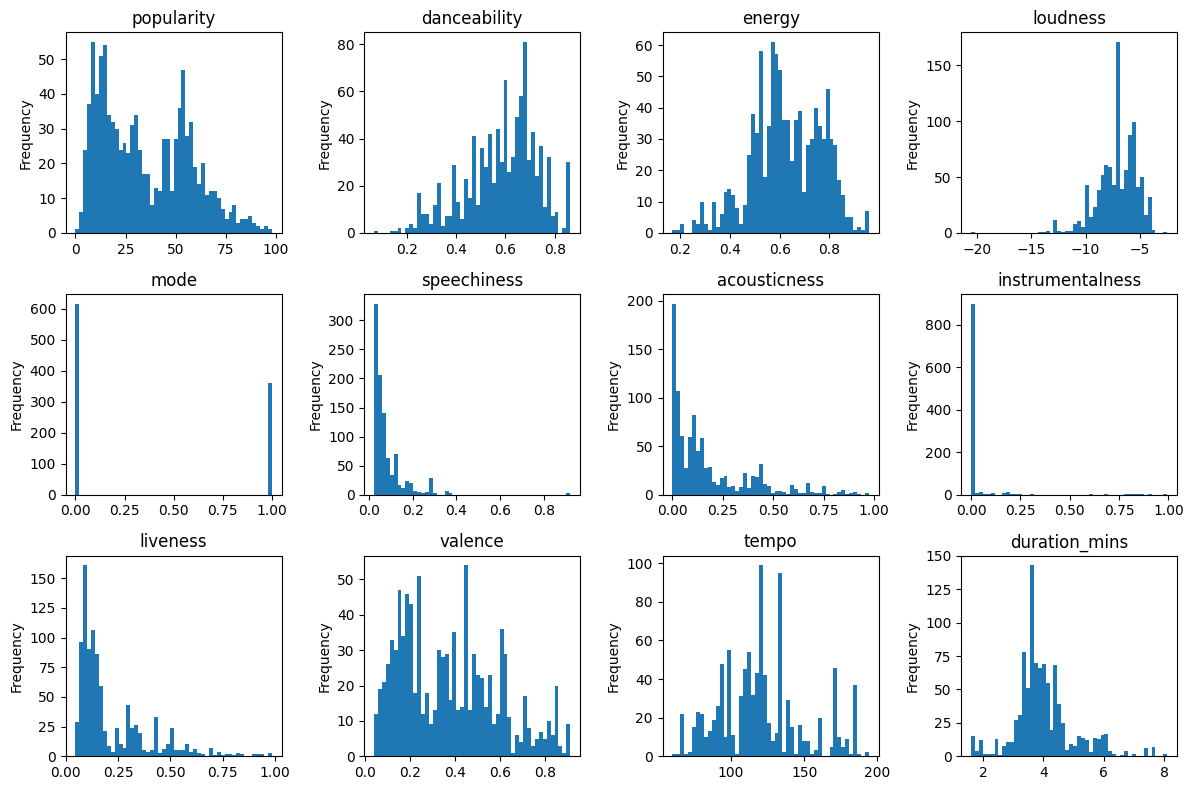

In [20]:
plot_feature_dists(data)
plt.show()

In [21]:
corr = calc_correlation(data)
corr

,popularity,danceability,energy,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_mins
popularity,1.000000,-0.035669,-0.093603,-0.143854,-0.048175,-0.021712,0.068572,0.026095,0.056904,-0.070311,-0.020939,0.057871
danceability,-0.035669,1.000000,0.216787,0.198980,0.037055,0.185954,-0.232783,-0.095795,-0.066006,0.595425,0.002392,0.009517
energy,-0.093603,0.216787,1.000000,0.665437,0.183535,0.087638,-0.436569,-0.126521,0.161956,0.346601,0.040580,-0.031268
loudness,-0.143854,0.198980,0.665437,1.000000,0.237635,-0.056968,-0.343048,-0.211467,0.097218,0.259928,0.074847,-0.012367
mode,-0.048175,0.037055,0.183535,0.237635,1.000000,0.194580,-0.205898,-0.087558,0.099021,0.037644,0.139956,-0.089721
speechiness,-0.021712,0.185954,0.087638,-0.056968,0.194580,1.000000,0.024620,-0.078327,-0.078292,0.266851,0.139268,-0.120074
acousticness,0.068572,-0.232783,-0.436569,-0.343048,-0.205898,0.024620,1.000000,-0.064672,-0.097303,-0.154078,-0.114684,-0.054336
instrumentalness,0.026095,-0.095795,-0.126521,-0.211467,-0.087558,-0.078327,-0.064672,1.000000,0.012126,-0.081654,-0.002578,-0.053497
liveness,0.056904,-0.066006,0.161956,0.097218,0.099021,-0.078292,-0.097303,0.012126,1.000000,0.000072,-0.070542,-0.167075
valence,-0.070311,0.595425,0.346601,0.259928,0.037644,0.266851,-0.154078,-0.081654,0.000072,1.000000,-0.076772,-0.170018


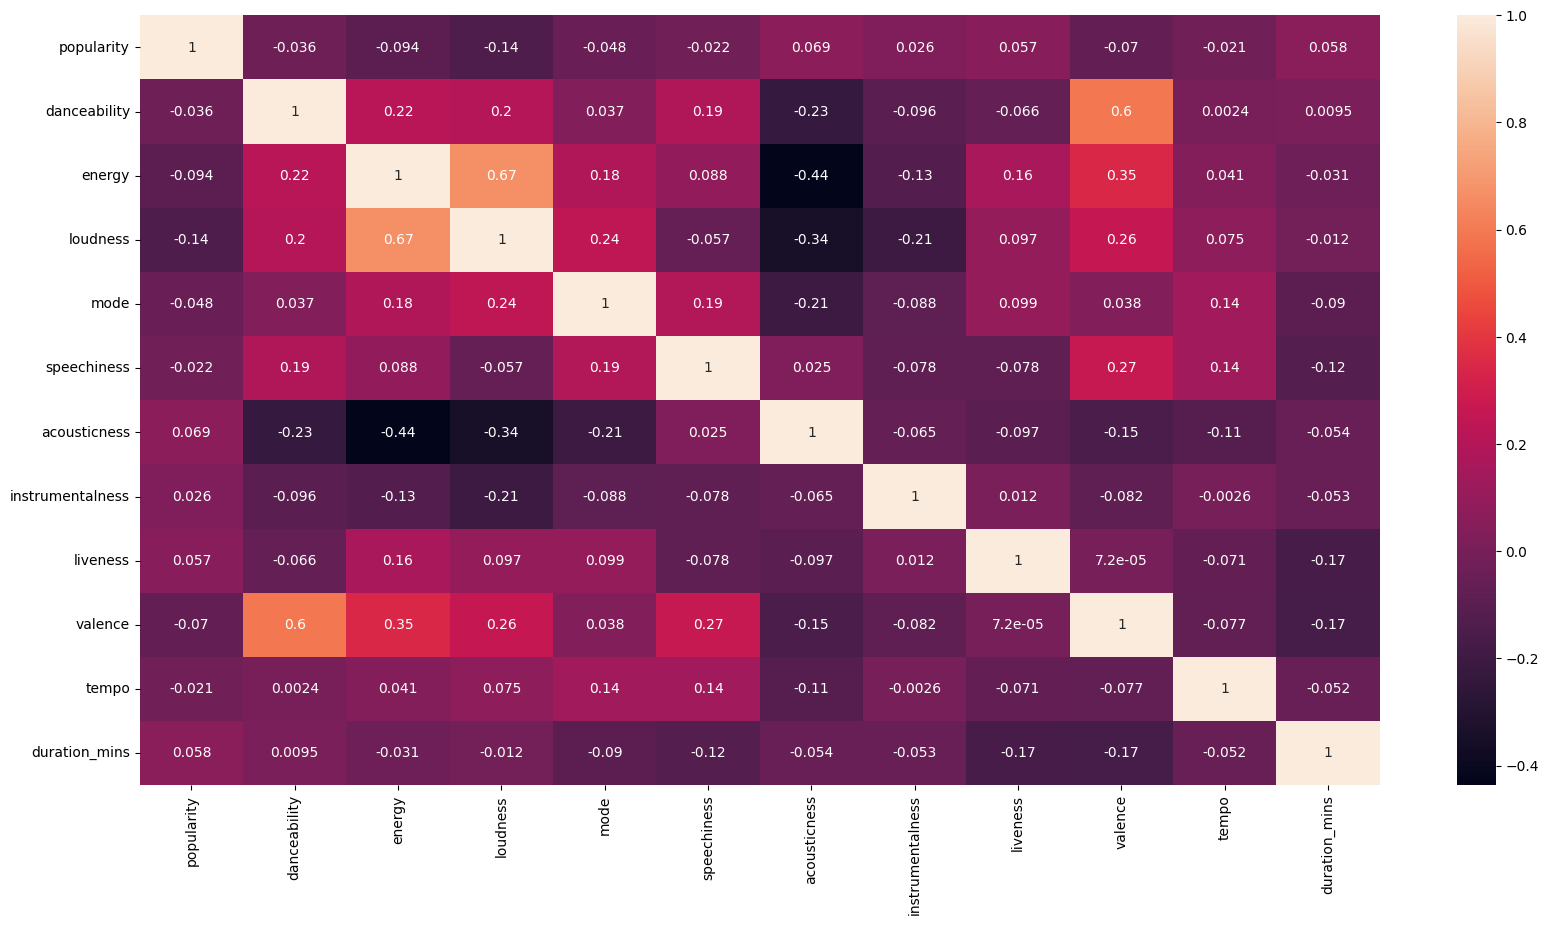

In [22]:
plot_correlation(corr)
plt.show()